###### in PCA we were interested in extracting the independent variables that explain the most variance. here with LDA, we are interesed in the independent variables that will separate the most the classes of the dependent variable. And therefore since this time it considers the classes of the dependent variable, that means that it considers the dependent variable to proceed to this feature extraction technique. That makes LDA supervised dimensionality reduction model as opposed to PCA that was unsupervised because we didn't consider the dependent viable and only independent variables.

#### same business problem as in PCA, only change the model part

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Apply LDA
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [2]:
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis as LDA

In [3]:
lda = LDA(n_components = 2)

#### in pca we did [X_train = pca.fit_transform(X_train)] because it was unsuprvised model, here we need to fit to y_train too, supervised model

In [4]:
X_train = lda.fit_transform(X_train, y_train) 
X_test = lda.transform(X_test)

## now we re ready to fit our classification model (logistic regression)

In [5]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

No wrong predictions, that was predicted by the fact that LDA, choose the two variables that separate well the classes

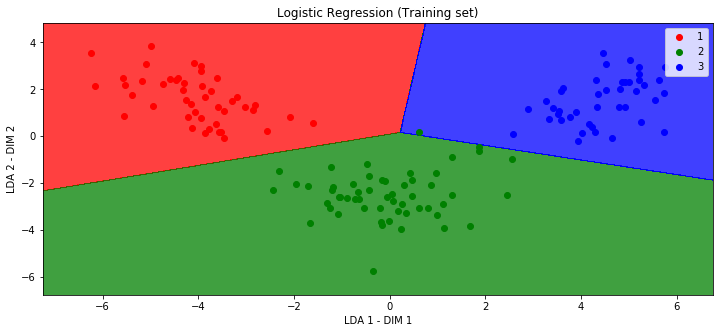

In [8]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize= (12,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LDA 1 - DIM 1')
plt.ylabel('LDA 2 - DIM 2')
plt.legend()
plt.show()

###### All right that's the training set results as we can see the prediction boundary is slightly different from the prediction boundary obtained in the previous section with pca because we can clearly see that each straight line composing this prediction boundary is separating Well the red points that correspond to customer segment number one to the green points that corresponds to customers segment number two. Indeed we can see that if we take the closest red point to the prediction boundary straight line and same if we take the closest green points to the same prediction boundary straight line. Well the red points are approximately equally distant to the straight line as the closest green points. So that's the definition of classes separability. But then if we look at the prediction boundary between the blue region and the green region corresponding to respectively customers number 3 and 2. Well we can see that  classes separability is less obvious when we look at the closest green points  and the closest blue points. that's actually just due to the fact that these points were considered as outliers by the LDA model.  So basically if we don't consider the outliers this LDA model made a perfect job at separating the three classes.

##### Now let's have a look at the test set results.

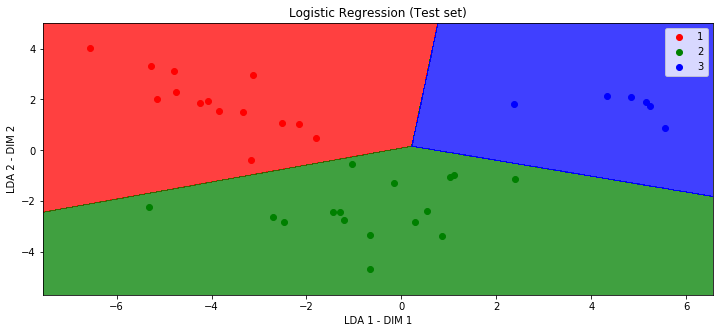

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize= (12,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA 1 - DIM 1')
plt.ylabel('LDA 2 - DIM 2')
plt.legend()
plt.show()

###### so again the three classes are well separated and we can clearly see the results that we obtained in our matrix of confusion that is this number of 0 incorrect predictions because indeed all the red points are in the red region, all the green ones are in the green region and all the blue ones are in the blue region. Each one is in its correct segment of customers and therefore this one business owner can feel pretty confident at predicting for each new wine to which customer segments he should recommend it. And not only he can be pretty confident that recommending the new wines to the right customers but also thanks to the feature extraction technique that allows him to visualize its results in two dimensions. Well now this wine business owner can make a clear plot of its different segment of customers and putting in each segment of customers the different wines. So eventually that can be pretty convenient. We managed to build a great LDA model

###### THE PCA and LDA are linear techniques adapted to linear problems. So since this problem is obviously a linear problem because we manage to apply very successfully linear models as PCA and now LDA, as well as the logistic regression model which is also Linear classification model, well it won't be relevant to apply a non-linear extraction mdodel on this dataset.

### So we will work on another dataset that is of course going to be non-linear.